# Notebook contents: 

This notebook contains a lecture. The code for generating plots are found at the of the notebook. Links below.

- [presentation](#Session-5:)
- [code for plots](#Code-for-plots)

# Session 5:
## Python plotting

*Andreas Bjerre-Nielsen*

# Remarks

- Starting Jupyter in another folder
  - Check out [this question on GitHub issues](https://github.com/abjer/sds2019/issues/3) - it points to a great answer on StackExchange
- Exercise solutions

# Repeating a quote by Hadley Wickham

> The bad news is that when ever you learn a new skill you’re going to suck. It’s going to be frustrating. The good news is that is typical and happens to everyone and **it is only temporary**. You can’t go from knowing nothing to becoming an expert without going through a period of great frustration and great suckiness.


# Recap
*What have we learned about Pandas?* (e.g. form, operators, selection, methods, IO)

- DataFrame, Series are like lists and dictionaries (duality)
- Numeric, comparison, logical operators also work on pandas objects 
- Boolean series to select subsets of data 
- Many powerful methods (numeric, e.g. `value_counts`, `unique`, `describe`)

*How do we store numeric variables?*

- `float` and `int` with level of precision (we use maximum precision 64bit)


# Agenda

1. [Background on plotting](#Understanding-plotting)
2. The [Python toolbox for plotting](#Python-plotting)
3. [Plots for one variable](#Plot-one-variable) (Series)
4. Plots for two or more variables (DataFrame):         
    - [numeric](#Plots-of-two-numeric-variables)  data
    - [mixed numeric and categorical](#Plots-with-mixed-variables) data
5. [Advanced exploratory plotting](#Advanced-exploratory-plotting)  

# Understanding plotting

## Why we plot

An English adage
> A picture is worth a thousand words

Is that always the case?


## What values do A,B,C,D have?
<center><img src='https://raw.githubusercontent.com/abjer/sds2017/master/slides/figures/excel1.png'></center>

## The shocking answer
<center><img src='https://raw.githubusercontent.com/abjer/sds2017/master/slides/figures/excel2.png'></center>


## Why are you plotting?
*Who's the audience?*

Others

- **Explanatory** plots: polished figures to convey your message

You / your team:

- **Exploratory** plots: fast for understanding data - minimal polishing.

## How should you plot (1)
*What are some tips for making **explanatory** plots in a report?*  ***<font color="red">(Exam relevant!)</font>***

1. Clear narratives - should convey key point(s)
  - If you to show difference between groups in data make sure it is easy to distinguish them.

1. Self explanatory
  - Contain axis label, title, footnotes in text containing relevant information.
1. Nice appereance 
  - Choose the right plot type.
  - Make sure font type, size, colors, line width.
1. Keep simplicity.
  - Anything unnecessary should be removed, see [this post](https://www.darkhorseanalytics.com/blog/data-looks-better-naked/).

## How should you plot (2)
*What is some practical advice on making **explanatory** plots?*

1. Try out a few plot types, using exploratory analysis - use what works.
1. Apply the *"layered grammer of graphics"*.
    - Start with an empty canvas
    - Fill the necessary things (axis, ticks, bars/lines, labels)

## How should you plot (3)
*What are some guidelines on making plots in **general**?*

Be aware of *what* you plot
- numerical vs. non-numeric (categorical)
- raw data vs. model results 

# Python plotting 

## Packages for Python plotting (1)
*What is the fundamental tool for making plots in Python?*

**Matplotlib** is the fundamental plotting module
- Can make almost any 2d plot.
- Can build publication ready figures.
- Caveat: 
    - requires time consuming customization;
    - requires practice.

In [1]:
import matplotlib.pyplot as plt
# allow printing in notebook
%matplotlib inline 

## Packages for Python plotting (2)
*What are good tools for fast, exploratory plots?*

`seaborn` has built-in capabilities to make plots
- Analyzing data, e.g. splitting by subsets
- Make interpolation of data to smooth out noise.

`pandas` can easily convert Series and DataFrames to plots

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns # high level plotting library

## Packages for Python plotting (3)
Seaborn comes with some illustrative datasets. We load `tips`.



In [5]:
tips = sns.load_dataset('tips')
print('Number of rows:',len(tips),'\n')
print(tips.head(7))

Number of rows: 244 

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2


# Plotting one variable

## Plot one numeric variable (1)
*How did we count categorical data?*

- Using `value_counts`.

Can we do something similar with numeric data?

In [13]:
tb = tips['total_bill']

cuts = np.arange(0, 100, 20) # range from 0 to 100 with 20 between
tb_cat = pd.cut(tb, cuts) # cut into categorical data
tb_cat.value_counts()

(0, 20]     147
(20, 40]     87
(40, 60]     10
(60, 80]      0
Name: total_bill, dtype: int64

## Plot one numeric variable (2)
*How do we plot the distribution of numerical variables?*

We often use the histogram. 
- Bins data and counts observations (made from cutting data)    
- Example of tips:

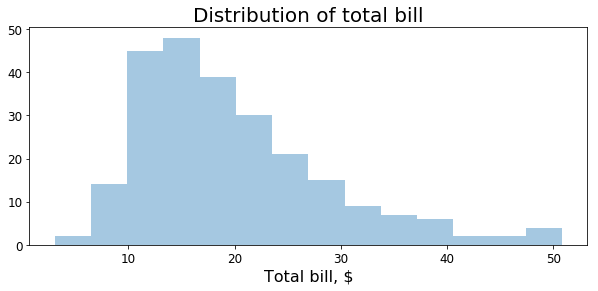

In [7]:
histplot

## Matplotlib and the grammar of graphics (1)
*Where do I start with making a plot?*

We will begin with the fundamental and flexible way. We start with our plotting canvas.

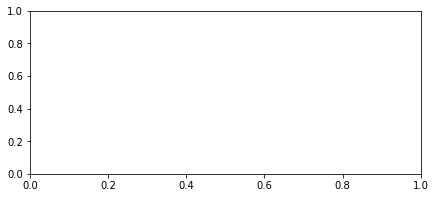

In [16]:
fig, ax = plt.subplots(figsize = (7, 3)) # create placeholder for plot

- `ax` contains most of the chart content as objects: 
    -  grid axes, labels, shapes we draw etc.
- `fig` the actual plot which is displayed (export to pdf etc.)

## Matplotlib and the grammar of graphics (2)
We can modify our canvas, e.g the axis scaling:

(0, 80)

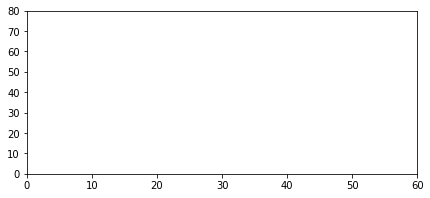

In [18]:
fig, ax = plt.subplots(figsize = (7, 3))
ax.set_xlim([0, 60]) # x-axis cutoffs 
ax.set_ylim([0, 80]) # y-axis cutoffs

## Matplotlib and the grammar of graphics (3)
We can draw plots on the canvas

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

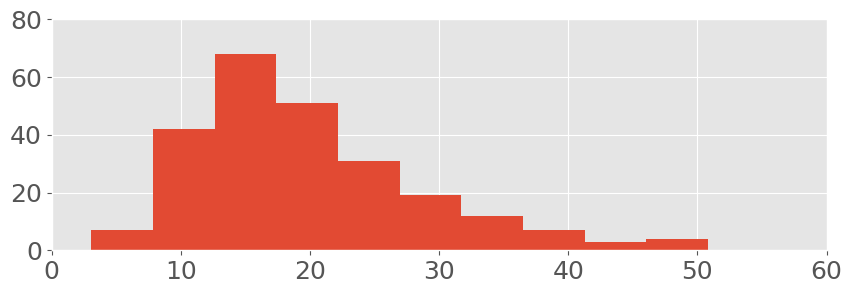

In [24]:
fig, ax = plt.subplots()
ax.set_xlim([0, 60])
ax.set_ylim([0, 80])
ax.hist(tb) # make plot

## Matplotlib and the grammar of graphics (4)
What might we change about our plot?
- Font size, x-axis label, y-axis label
- Color, thinner lines around bars

We will try customization in the exercises today.

## Matplotlib and the grammar of graphics (5)
*Can we change matplotlib defaults?*

Yes, this may be very useful. For instance plot size. Recommend `ggplot` as style.

In [25]:
plt.style.use('default') # set style (colors, background, size, gridlines etc.) # ggplot
plt.rcParams['figure.figsize'] = 10, 3 # set default size of plots
plt.rcParams.update({'font.size': 18})

## Plotting with pandas
Pandas has a quick and dirty implemention. Let's try the code below.

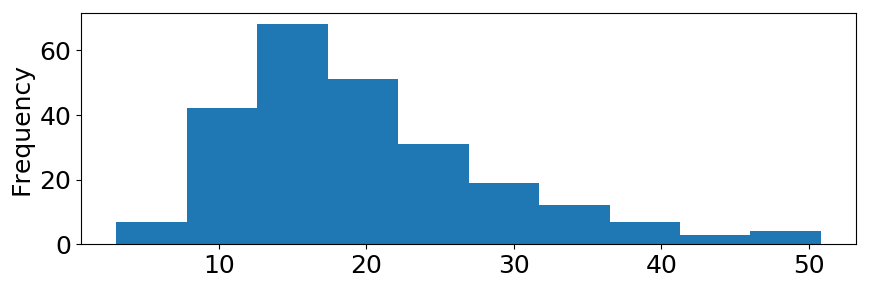

In [27]:
tb.plot.hist()

## Plotting with Seaborn (1)
The module Seaborn is great for fast plots that look good.

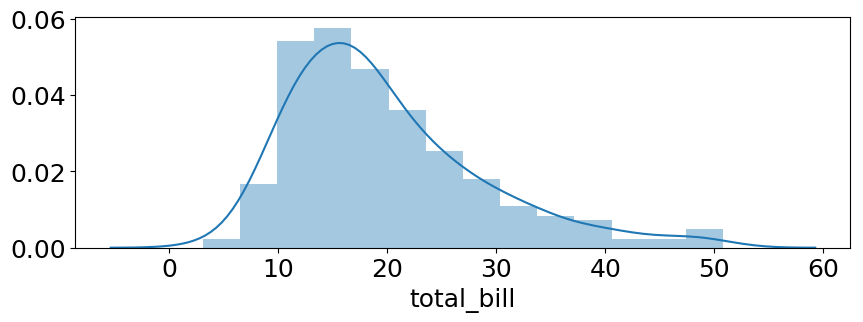

In [30]:
sns.distplot(tb)  # histogram for seaborn, what is KDE?

## Plotting with Seaborn (2)
*How can we use Seaborn for cumulative plots?*

Yes, we just need some arguments.

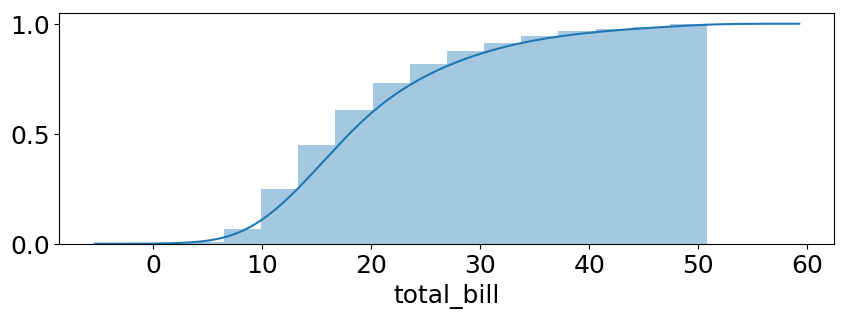

In [43]:
sns.distplot(tb, hist_kws={'cumulative': True}, kde_kws={'cumulative': True})  

## Summing up


How did our tools perform? 

- Matplotlib is good for customization (explanatory plots)
- Seaborn and Pandas are good quick and dirty plots (exploratory)


## Plotting one categorical variable


*What is categorical data?*

Categorical is non-numeric data (this afternoon).

## Plotting one categorical variable (2)


*How can we plot categorical data?* Pie chart is ugly..

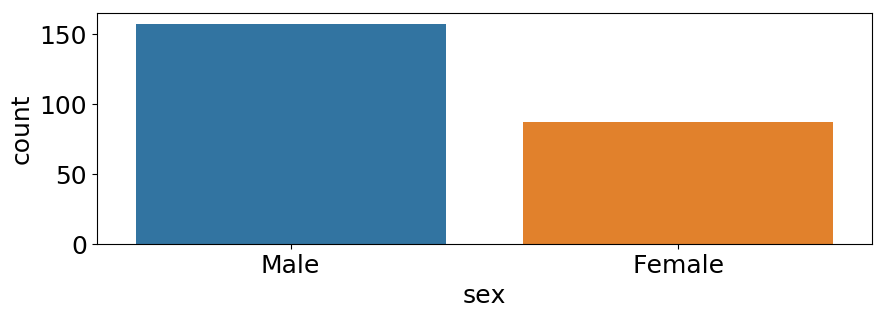

In [32]:
sns.countplot(x='sex', data=tips)

# Plots of two numeric variables

## Two numeric variables (1)
*How do we plot two numeric variables?*

If we have little data we can make a point cloud, i.e. a scatter plot.

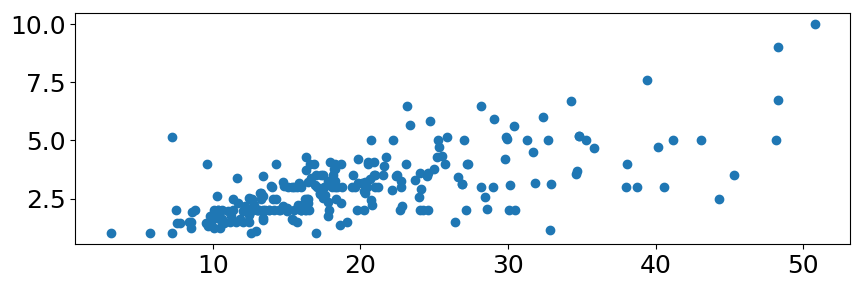

In [33]:
plt.scatter(x=tips['total_bill'], y=tips['tip'])

## Two numeric variables (2)
*Quiz: How might we alter the scatter plot?*

We can interpolate the data:

C:\Users\bvq720\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


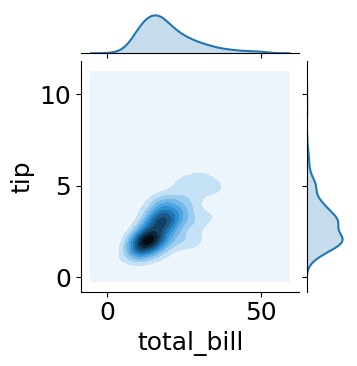

In [37]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde', size=4) # hex

## Two numeric variables (3)
*What if we want to see the linear relationship?*

We use the linear model plot:

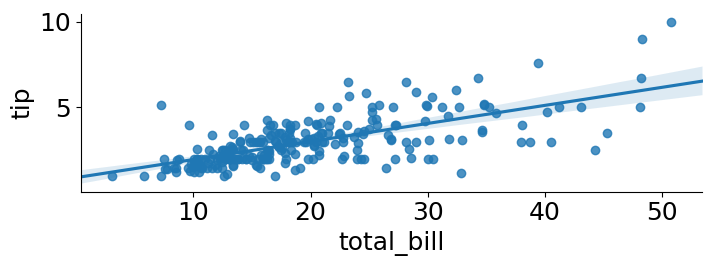

In [51]:
sns.lmplot(x='total_bill', y='tip', data=tips, size=3, aspect=2.5) 

# Plots with mixed variables

## Table format

*How did we define a tidy/long table?*

One row for each observation

<center><img src='https://raw.githubusercontent.com/abjer/sds2017/master/slides/figures/tidy.png'></center>

## Mixed types - numeric, categorical (1)

*How might we use categorical variables?*


- We can split data and make plots based on subsets of data!

## Mixed types - numeric, categorical (2)

Let's make a plot the mean tips - distinguish by weekday:

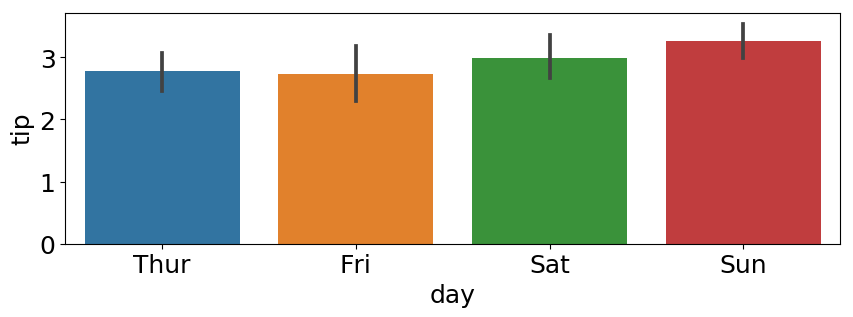

In [55]:
sns.barplot(x='day', y='tip',  data=tips) # hue='sex'

## Mixed types - numeric, categorical (3)
Let's make a plot the tip quartiles - distinguish by sex:

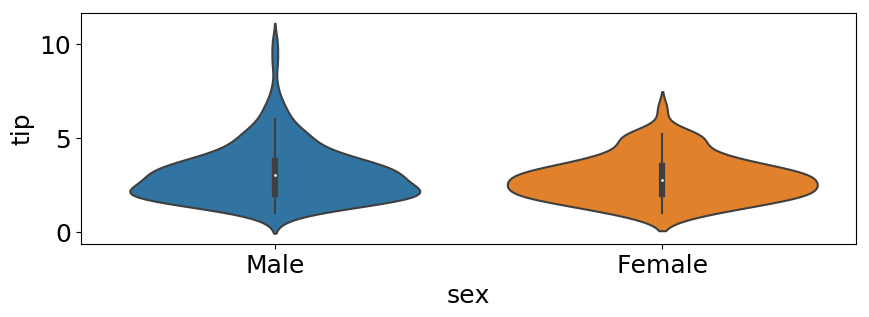

In [43]:
f,ax = plt.subplots()
sns.boxplot(x='sex', y='tip', data=tips, ax=ax)
f.savefig('my_box.pdf')
# sns.violinplot(x='sex', y='tip', data=tips)

## Mixed types - numeric, categorical (4)
Let's make a linear model plot the - distinguish slope by sex:

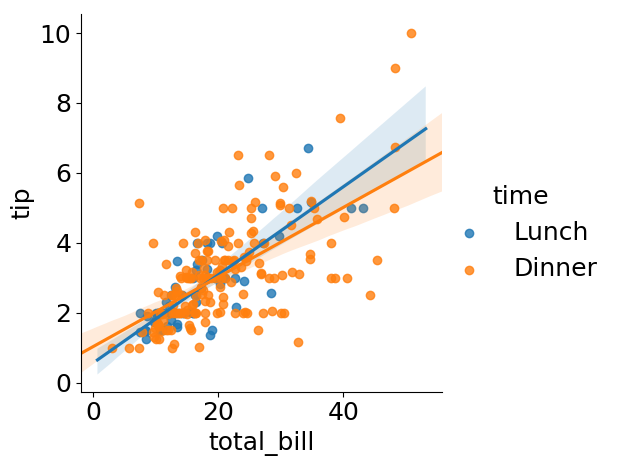

In [45]:
sns.lmplot('total_bill', 'tip', hue='time', data=tips)

# Advanced exploratory plotting 

## Plot grids (1)

*How can we plot the relationship for more than two numeric variables?*

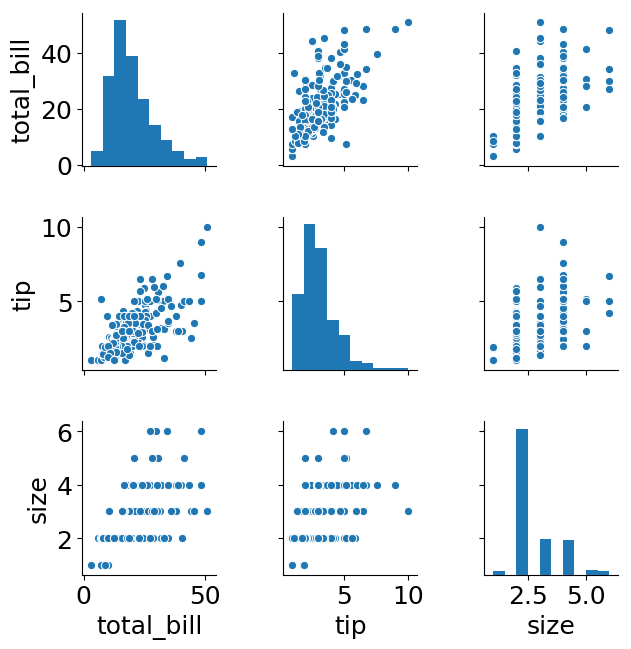

In [47]:
sns.pairplot(tips, height=2.3) # make hist and scatter for all

## Plot grids (2)

*Can we split the data to investigate heterogeneous relationships?*

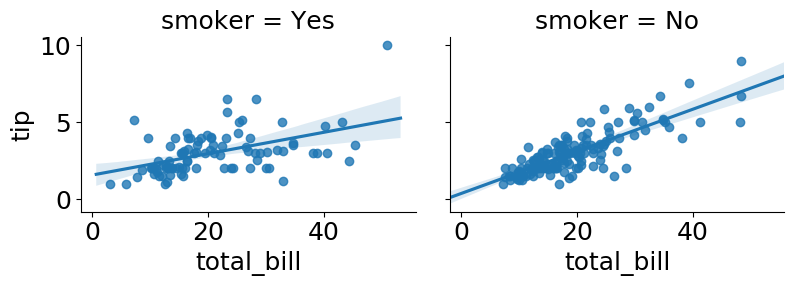

In [53]:
g = sns.FacetGrid(tips, col='smoker',  height=3.2, aspect=1.3) #row='sex'
g = g.map(sns.regplot, 'total_bill', 'tip')

Can we say anything about smokers tipping behavior?

# Code for plots

### Histogram

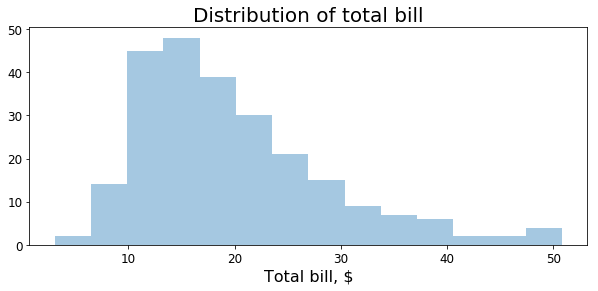

In [6]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")

histplot,ax = plt.subplots(1, 1, figsize=(10,4))
sns.distplot(sns.load_dataset('tips').total_bill, kde=False, ax=ax)
ax.set_title('Distribution of total bill')
ax.set_xlabel('Total bill, $')
ax.title.set_fontsize(20)
ax.xaxis.label.set_fontsize(16)
    
for item in ax.get_yticklabels()+ax.get_xticklabels():
    item.set_fontsize(12)    

# The end

[Return to Agenda](#Agenda)